In [1]:
# Import all required libraries
import torch
from datasets import load_dataset
from recbole.config import Config
from recbole.data import create_dataset, data_preparation
from recbole.model.general_recommender import BPR, Pop, ItemKNN
from recbole.model.sequential_recommender import SASRec
from recbole.utils import init_seed, init_logger, get_trainer

# Set torch.load compatibility
torch.serialization.add_safe_globals([dict, list, tuple, set])

print("All libraries imported successfully!")

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


All libraries imported successfully!


## Recaller Training

In [2]:
# Load Amazon Reviews 2023 dataset using RecBole
from GRPO.data import get_base_config_dict
import os
for dataset_name in os.listdir('dataset'):
    try:
        config_5core = Config(
            model='SASRec',
            dataset=dataset_name, 
            config_dict=get_base_config_dict(dataset_name)
        )

        # 创建5-core过滤后的数据集
        print(f"=== Loading {dataset_name} ===")
        print("Creating 5-core filtered dataset...")
        from recbole.utils import init_seed as recbole_init_seed
        recbole_init_seed(seed=42, reproducibility=True)
        dataset_5core = create_dataset(config_5core)
        train_data_5core, valid_data_5core, test_data_5core = data_preparation(config_5core, dataset_5core)
        print(f"\n📊 5-core Filtered Dataset Statistics:")
        print(dataset_5core)
        # train set stats
        import numpy as np
        print(train_data_5core.dataset)
        print(np.unique(train_data_5core.dataset.inter_feat['user_id'].numpy()).shape)
        print(valid_data_5core.dataset)
        print(np.unique(valid_data_5core.dataset.inter_feat['user_id'].numpy()).shape)
        print(test_data_5core.dataset)
        print(np.unique(test_data_5core.dataset.inter_feat['user_id'].numpy()).shape)
    except Exception as e:
        print(f"Error loading {dataset_name}: {e}")
        continue



=== Loading steam ===
Creating 5-core filtered dataset...


/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


📊 5-core Filtered Dataset Statistics:
steam
The number of users: 25390
Average actions of users: 11.929930284768995
The number of items: 4090
Average actions of items: 74.07410124724872
The number of inters: 302889
The sparsity of the dataset: 99.70832615116169%
Remain Fields: ['user_id', 'product_id', 'timestamp', 'product_id_list', 'timestamp_list', 'item_length']
steam
The number of users: 25390
Average actions of users: 9.929930284768995
The number of items: 4090
Average actions of items: 61.701174743024964
The number of inters: 252111
The sparsity of the dataset: 99.75722398071744%
Remain Fields: ['user_id', 'product_id', 'timestamp', 'product_id_list', 'timestamp_list', 'item_length']
(25389,)
steam
The number of users: 25390
Average actions of users: 1.0
The number of items: 4090
Average actions of items: 9.252551020408163
The number of inters: 25389
The sparsity of the dataset: 99.97555108522212%
Remain Fields: ['user_id', 'product_id', 'timestamp', 'product_id_list', 'timesta

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


📊 5-core Filtered Dataset Statistics:
ml-10m
The number of users: 69815
Average actions of users: 117.03065287764632
The number of items: 9889
Average actions of items: 826.2922734627832
The number of inters: 8170378
The sparsity of the dataset: 98.81657420789803%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
ml-10m
The number of users: 69815
Average actions of users: 115.03065287764632
The number of items: 9889
Average actions of items: 812.1713187702265
The number of inters: 8030750
The sparsity of the dataset: 98.83679841007076%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(69814,)
ml-10m
The number of users: 69815
Average actions of users: 1.0
The number of items: 9889
Average actions of items: 11.552871090517955
The number of inters: 69814
The sparsity of the dataset: 99.98988789891364%
Remain Fields: ['user_id', 'item_id',

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


📊 5-core Filtered Dataset Statistics:
Amazon_Toys_and_Games
The number of users: 360660
Average actions of users: 7.992821474023939
The number of items: 143927
Average actions of items: 20.03031629561689
The number of inters: 2882683
The sparsity of the dataset: 99.99444662967173%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
Amazon_Toys_and_Games
The number of users: 360660
Average actions of users: 5.992821474023939
The number of items: 143927
Average actions of items: 15.07564449528486
The number of inters: 2161365
The sparsity of the dataset: 99.99583621915433%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(360659,)
Amazon_Toys_and_Games
The number of users: 360660
Average actions of users: 1.0
The number of items: 143927
Average actions of items: 3.597631896577522
The number of inters: 360659
The sparsity of the dataset: 99.

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


📊 5-core Filtered Dataset Statistics:
ml-1m
The number of users: 6039
Average actions of users: 137.42149718449818
The number of items: 3308
Average actions of items: 250.9074690051406
The number of inters: 829751
The sparsity of the dataset: 95.84647093369118%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
ml-1m
The number of users: 6039
Average actions of users: 135.42149718449818
The number of items: 3308
Average actions of items: 247.25582098578772
The number of inters: 817675
The sparsity of the dataset: 95.90692041432422%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(6038,)
ml-1m
The number of users: 6039
Average actions of users: 1.0
The number of items: 3308
Average actions of items: 3.244492208490059
The number of inters: 6038
The sparsity of the dataset: 99.96977525968347%
Remain Fields: ['user_id', 'item_id', 'rating',

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


📊 5-core Filtered Dataset Statistics:
yelp2022
The number of users: 207649
Average actions of users: 14.340557096625059
The number of items: 89204
Average actions of items: 33.38252505549203
The number of inters: 2977788
The sparsity of the dataset: 99.98392394059113%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
yelp2022
The number of users: 207649
Average actions of users: 12.340557096625059
The number of items: 89204
Average actions of items: 28.747470214723236
The number of inters: 2562492
The sparsity of the dataset: 99.98616598171972%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(207648,)
yelp2022
The number of users: 207649
Average actions of users: 1.0
The number of items: 89204
Average actions of items: 3.85118142364331
The number of inters: 207648
The sparsity of the dataset: 99.9988789794357%
Remain Fields: ['user_id'

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


📊 5-core Filtered Dataset Statistics:
Amazon_Books
The number of users: 689537
Average actions of users: 11.156473338592908
The number of items: 449585
Average actions of items: 17.11140175856539
The number of inters: 7692790
The sparsity of the dataset: 99.99751849880246%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
Amazon_Books
The number of users: 689537
Average actions of users: 9.156473338592908
The number of items: 449585
Average actions of items: 14.076404805008337
The number of inters: 6313718
The sparsity of the dataset: 99.99796335285664%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(689536,)
Amazon_Books
The number of users: 689537
Average actions of users: 1.0
The number of items: 449585
Average actions of items: 2.8250062478746982
The number of inters: 689536
The sparsity of the dataset: 99.9997775729729%
Remain Fi

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

Error loading book-crossing: [timestamp] is not exist in interaction [The batch_size of interaction: 116923
    user_id, torch.Size([116923]), cpu, torch.int64
    item_id, torch.Size([116923]), cpu, torch.int64
    rating, torch.Size([116923]), cpu, torch.float32

].
=== Loading Amazon_All_Beauty ===
Creating 5-core filtered dataset...


/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


📊 5-core Filtered Dataset Statistics:
Amazon_All_Beauty
The number of users: 199
Average actions of users: 8.535353535353535
The number of items: 281
Average actions of items: 6.101083032490974
The number of inters: 1690
The sparsity of the dataset: 96.97777141937445%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
Amazon_All_Beauty
The number of users: 199
Average actions of users: 6.5353535353535355
The number of items: 281
Average actions of items: 4.864661654135339
The number of inters: 1294
The sparsity of the dataset: 97.68593858974587%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(198,)
Amazon_All_Beauty
The number of users: 199
Average actions of users: 1.0
The number of items: 281
Average actions of items: 1.5114503816793894
The number of inters: 198
The sparsity of the dataset: 99.64591641481428%
Remain Fields: ['user_id

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


📊 5-core Filtered Dataset Statistics:
Amazon_Musical_Instruments
The number of users: 48454
Average actions of users: 7.8265742059315215
The number of items: 21414
Average actions of items: 17.713158017656127
The number of inters: 379221
The sparsity of the dataset: 99.96345188811027%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
Amazon_Musical_Instruments
The number of users: 48454
Average actions of users: 5.8265742059315215
The number of items: 21414
Average actions of items: 13.218850962213795
The number of inters: 282315
The sparsity of the dataset: 99.97279137967531%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(48453,)
Amazon_Musical_Instruments
The number of users: 48454
Average actions of users: 1.0
The number of items: 21414
Average actions of items: 3.3051159618008183
The number of inters: 48453
The sparsity of the da

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

Error loading anime: [timestamp] is not exist in interaction [The batch_size of interaction: 7793926
    user_id, torch.Size([7793926]), cpu, torch.int64
    item_id, torch.Size([7793926]), cpu, torch.int64
    rating, torch.Size([7793926]), cpu, torch.float32

].
=== Loading Food ===
Creating 5-core filtered dataset...


/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which


📊 5-core Filtered Dataset Statistics:
Food
The number of users: 16645
Average actions of users: 30.48594087959625
The number of items: 39448
Average actions of items: 12.863031409232642
The number of inters: 507408
The sparsity of the dataset: 99.92272330829917%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
Food
The number of users: 16645
Average actions of users: 28.48594087959625
The number of items: 39448
Average actions of items: 12.019469654717842
The number of inters: 474120
The sparsity of the dataset: 99.9277929692295%
Remain Fields: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(16644,)
Food
The number of users: 16645
Average actions of users: 1.0
The number of items: 39448
Average actions of items: 1.7695088241547947
The number of inters: 16644
The sparsity of the dataset: 99.99746516953483%
Remain Fields: ['user_id', 'item_id', 'rati

In [2]:
# Define unified model training function
def train_model(model_type, dataset_name='All_Beauty', epochs=10, **kwargs):
    """
    Unified function to train recommendation models
    
    Args:
        model_type: Model type ('BPR', 'SASRec', 'Pop')
        dataset_name: Dataset name
        epochs: Training epochs·
        **kwargs: Additional model-specific parameters
    
    Returns:
        dict: Dictionary containing model, trainer, config and results
    """
    
    print(f"\n=== Training {model_type} Model ===")
    
    # Base configuration
    base_config = {
        # 'data_path': 'seq_rec_results/dataset/processed/',
        # 'benchmark_filename': ['train', 'valid', 'test'],
        'epochs': epochs,
        'stopping_step': 10,
        'eval_step': 1,
        'metrics': ['Recall', 'NDCG'],
        'topk': [10, 50],
        'valid_metric': 'NDCG@10',
        'checkpoint_dir': './checkpoints/',
        'show_progress': True
    }
    base_config.update({
        'data_path': 'dataset',
        'load_col': {
            # 'inter': ['user_id', 'item_id', 'rating', 'timestamp'],
            'inter': ['user_id', 'product_id', 'timestamp']
        },
        'user_inter_num_interval': "[5,inf)",
        'item_inter_num_interval': "[5,inf)",
        'train_neg_sample_args': None,
        'loss_type': 'CE',
        # 'val_interval': {
        #     'rating': '[3,inf)'  # 只保留rating >= 4的交互
        # },
        'eval_args': {
            'split': {'LS': 'valid_and_test'},  # Leave-One-Out
            'order': 'TO',  # Temporal Order
            'group_by': 'user'
        },
        'ITEM_ID_FIELD': 'product_id',
    })
    
    # Model-specific configurations
    if model_type == 'BPR':
        model_class = BPR
        model_config = {
            **base_config,
            'train_neg_sample_args': {
                'distribution': 'uniform',
                'sample_num': 1,
                'alpha': 1.0,
                'dynamic': False,
                'candidate_num': 0
            },
            'loss_type': 'BPR',
            'learning_rate': 0.001,
            'train_batch_size': 2048,
            'eval_batch_size': 2048 * 20000,
        }
        
    elif model_type == 'SASRec':
        model_class = SASRec
        model_config = {
            **base_config,
            'train_neg_sample_args': None,
            'loss_type': 'CE',
            'learning_rate': 0.001,
            'train_batch_size': 256,
            'max_seq_length': 50,
            'hidden_size': 64,
            'n_layers': 2,
            'n_heads': 2,
            'inner_size': 256,
            'hidden_dropout_prob': 0.5,
            'attn_dropout_prob': 0.5,
        }
        
    elif model_type == 'Pop':
        model_class = Pop
        model_config = {
            **base_config,
            'train_neg_sample_args': None,
        }
    elif model_type == 'ItemKNN':
        model_class = ItemKNN
        model_config = {
            **base_config,
            'train_neg_sample_args': None,
            'eval_batch_size': 2048 * 20000,
        }
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    # Merge user-defined parameters
    model_config.update(kwargs)
    
    # Create config and dataset
    config = Config(
        model=model_type,
        dataset=dataset_name,
        config_dict=model_config
    )
    
    # Create dataset
    model_dataset = create_dataset(config)
    train_data, valid_data, test_data = data_preparation(config, model_dataset)
    
    print(f"{model_type} dataset stats:")
    print(f"Users: {model_dataset.user_num}")
    print(f"Items: {model_dataset.item_num}")
    print(f"Interactions: {model_dataset.inter_num}")
    
    # Initialize model and trainer
    init_seed(config['seed'], config['reproducibility'])
    model = model_class(config, model_dataset).to(config['device'])
    trainer = get_trainer(config['MODEL_TYPE'], config['model'])(config, model)
    
    print(f"Training {model_type} model...")
    
    # torch.load compatibility settings
    original_load = torch.load
    def safe_load(*args, **kwargs):
        kwargs['weights_only'] = False
        return original_load(*args, **kwargs)
    torch.load = safe_load
    
    try:
        # Train model
        best_valid_score, best_valid_result = trainer.fit(
            train_data, valid_data, saved=True, show_progress=True
        )
        
        print(f"{model_type} training completed!")
        print(f"Best validation result: {best_valid_result}")
        
        # Test model
        test_result = trainer.evaluate(test_data, load_best_model=True, show_progress=True)
        print(f"{model_type} test result: {test_result}")
        
        return {
            'model_type': model_type,
            'model': model,
            'trainer': trainer,
            'config': config,
            'dataset': model_dataset,
            'train_data': train_data,
            'valid_data': valid_data,
            'test_data': test_data,
            'best_valid_result': best_valid_result,
            'test_result': test_result
        }
        
    finally:
        # Restore original torch.load function
        torch.load = original_load

print("Unified training function defined!")

Unified training function defined!


In [3]:
# Train all models using unified function
print("=== Training All Models with Unified Function ===")

# Store all model results
model_results = {}
dataset_name = "ml-10m"
# Train all three models
models_to_train = [
    {'model_type': 'Pop', 'epochs': 1},  # Pop model trains quickly
    {'model_type': 'BPR', 'epochs': 100},  # BPR model
    {'model_type': 'SASRec', 'epochs': 100},  # SASRec model
    {'model_type': 'ItemKNN', 'epochs': 1}  # ItemKNN model
]

for model_config in models_to_train:
    try:
        result = train_model(
            dataset_name=dataset_name,
            model_type=model_config['model_type'],
            epochs=model_config['epochs']
        )
        model_results[model_config['model_type']] = result
        print(f"✅ {model_config['model_type']} training successful")
    except Exception as e:
        print(f"❌ {model_config['model_type']} training failed: {str(e)}")
        model_results[model_config['model_type']] = None

print(f"\nTraining completed! Successfully trained {len([r for r in model_results.values() if r is not None])} models")

=== Training All Models with Unified Function ===

=== Training Pop Model ===
❌ Pop training failed: 'product_id'

=== Training BPR Model ===
❌ BPR training failed: 'product_id'

=== Training SASRec Model ===
❌ SASRec training failed: 'product_id'

=== Training ItemKNN Model ===
❌ ItemKNN training failed: 'product_id'

Training completed! Successfully trained 0 models


In [6]:
# Unified model performance comparison and analysis
def compare_models(model_results):
    """Compare all trained models"""
    
    print("\n" + "="*70)
    print("                Model Performance Comparison Report")
    print("="*70)
    
    # Extract test results
    results_summary = {}
    for model_type, result in model_results.items():
        if result is not None:
            results_summary[model_type] = result['test_result']
        else:
            results_summary[model_type] = {}
    
    # Create comparison table
    print(f"\n{'Metric':<15}", end="")
    model_names = list(results_summary.keys())
    for name in model_names:
        print(f" | {name:<12}", end="")
    print()
    print("-" * (15 + 15 * len(model_names)))
    
    metrics_to_compare = ['recall@10', 'ndcg@10', 'recall@20', 'ndcg@20']
    best_scores = {}
    
    for metric in metrics_to_compare:
        print(f"{metric:<15}", end="")
        metric_values = []
        
        for model_type in model_names:
            value = results_summary[model_type].get(metric, 'N/A')
            if value != 'N/A':
                print(f" | {value:<12.4f}", end="")
                metric_values.append((model_type, value))
            else:
                print(f" | {'N/A':<12}", end="")
        
        print()
        
        # Find best model
        if metric_values:
            best_model, best_score = max(metric_values, key=lambda x: x[1])
            best_scores[metric] = (best_model, best_score)
    
    print("-" * (15 + 15 * len(model_names)))
    
    # Analyze best models
    print(f"\n🏆 Best model for each metric:")
    for metric, (best_model, best_score) in best_scores.items():
        print(f"  {metric}: {best_model} ({best_score:.4f})")
    
    # Overall model ranking
    model_scores = {name: [] for name in model_names}
    for metric in metrics_to_compare:
        for model_type in model_names:
            value = results_summary[model_type].get(metric, 0)
            if value != 'N/A' and value != 0:
                model_scores[model_type].append(value)
    
    avg_scores = {name: sum(scores)/len(scores) if scores else 0 
                  for name, scores in model_scores.items()}
    
    print(f"\n📊 Overall model ranking:")
    sorted_models = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)
    for i, (model, score) in enumerate(sorted_models, 1):
        print(f"  {i}. {model}: {score:.4f} (avg score)")
    
    # Model characteristics analysis
    print(f"\n📝 Model characteristics:")
    model_analysis = {
        'Pop': 'Item popularity based, fast training, good for cold start',
        'BPR': 'Collaborative filtering, personalized, balanced performance',  
        'SASRec': 'Sequential recommendation, temporal patterns, rich historical data'
    }
    
    for model_type in model_names:
        if model_type in model_analysis:
            status = "✅ Success" if model_results[model_type] else "❌ Failed"
            print(f"  • {model_type}: {model_analysis[model_type]} [{status}]")
    
    return best_scores, sorted_models

# Execute model comparison
if model_results:
    best_scores, model_ranking = compare_models(model_results)
else:
    print("⚠️ No model results to compare, please run model training first")


                Model Performance Comparison Report

Metric          | Pop          | BPR          | SASRec       | ItemKNN     
---------------------------------------------------------------------------
recall@10       | 0.0000       | 0.0000       | 0.0455       | 0.8611      
ndcg@10         | 0.0000       | 0.0000       | 0.0196       | 0.8055      
recall@20       | 0.0000       | 0.1111       | 0.4091       | 0.9444      
ndcg@20         | 0.0000       | 0.0319       | 0.1104       | 0.8286      
---------------------------------------------------------------------------

🏆 Best model for each metric:
  recall@10: ItemKNN (0.8611)
  ndcg@10: ItemKNN (0.8055)
  recall@20: ItemKNN (0.9444)
  ndcg@20: ItemKNN (0.8286)

📊 Overall model ranking:
  1. ItemKNN: 0.8599 (avg score)
  2. SASRec: 0.1462 (avg score)
  3. BPR: 0.0715 (avg score)
  4. Pop: 0.0000 (avg score)

📝 Model characteristics:
  • Pop: Item popularity based, fast training, good for cold start [✅ Success]
  • BPR: Coll

## Dataset Test

In [14]:
import json
import os
domain = 'Amazon_All_Beauty'

In [ ]:
from datasets import load_dataset
# domain = 'All_Beauty'
# meta_data = json.load(open(f'seq_rec_results/dataset/processed/{domain}/{domain}.data_maps'))
datasets = load_dataset(
    "McAuley-Lab/Amazon-Reviews-2023",
    f"5core_timestamp_w_his_{domain}",
    trust_remote_code=True
)
raw_review_path = f'dataset/{domain}/{domain}.jsonl'
if not os.path.exists(raw_review_path):
    print(f'Downloading {domain} reviews from Hugging Face...')
    import wget
    wget.download(f'https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/{domain}.jsonl?download=true', raw_review_path)
# len(meta_data['item2id']), len(meta_data['user2id'])

FileNotFoundError: [Errno 2] No such file or directory: 'seq_rec_results/dataset/processed/Amazon_All_Beauty/Amazon_All_Beauty.data_maps'

In [ ]:
from tqdm import tqdm
review_list = []
with open(raw_review_path, 'r') as f:
    for line in tqdm(f):
        review_list.append(json.loads(line))


3017439it [00:32, 92240.45it/s] 


In [4]:
user_set = set(meta_data['user2id'].keys())
item_set = set(meta_data['item2id'].keys())

In [5]:
review_list[0]

{'rating': 5.0,
 'title': 'Five Stars',
 'text': 'Great headphones, comfortable and sound is good. No complaints. I would buy again.',
 'images': [],
 'asin': 'B003LPTAYI',
 'parent_asin': 'B003LPTAYI',
 'user_id': 'AGKASBHYZPGTEPO6LWZPVJWB2BVA',
 'timestamp': 1452650586000,
 'helpful_vote': 0,
 'verified_purchase': True}

In [ ]:
from collections import defaultdict

user2reviews = defaultdict(list)
for review in tqdm(review_list):
    if review['user_id'] in user_set and review['asin'] in item_set:
        user2reviews[review['user_id']].append({
            'asin': review['asin'],
            'rating': review['rating'],
            'title': review['title'],
            'text': review['text'],
            'item_id': meta_data['item2id'][review['asin']],
            'timestamp': review['timestamp'],
            'helpful_vote': review['helpful_vote'],
            'verified_purchase': review['verified_purchase'],
        })

    

100%|██████████| 3017439/3017439 [00:02<00:00, 1327701.45it/s]


In [7]:
# save user2reviews
with open(f'seq_rec_results/dataset/processed/{domain}/{domain}.reviews', 'w') as f:
    json.dump(user2reviews, f)

## General Test

In [4]:
import outlines
from transformers import AutoTokenizer, AutoModelForCausalLM


MODEL_NAME = "meta-llama/Llama-3.1-8B-Instruct"
model = outlines.from_transformers(
    AutoModelForCausalLM.from_pretrained(MODEL_NAME, device_map="auto"),
    AutoTokenizer.from_pretrained(MODEL_NAME)
)

Loading checkpoint shards: 100%|██████████| 4/4 [00:12<00:00,  3.05s/it]


In [5]:
from pydantic import BaseModel
from enum import Enum

class Rating(Enum):
    poor = 1
    fair = 2
    good = 3
    excellent = 4

class ProductReview(BaseModel):
    rating: Rating
    pros: list[str]
    cons: list[str]
    summary: str

review = model(
    "Review: The XPS 13 has great battery life and a stunning display, but it runs hot and the webcam is poor quality.",
    ProductReview,
    max_new_tokens=200,
)

review = ProductReview.model_validate_json(review)
print(f"Rating: {review.rating.name}")  # "Rating: good"
print(f"Pros: {review.pros}")           # "Pros: ['great battery life', 'stunning display']"
print(f"Summary: {review.summary}")     # "Summary: Good laptop with great display but thermal issues"

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Rating: excellent
Pros: ['long battery life', 'stunning display', 'portable']
Summary: The Dell XPS 13 is a solid laptop that excels in battery life and display quality, but it has some drawbacks that prevent it from being a top contender in its class.


## vLLM Test

In [1]:
from enum import Enum
from pydantic import BaseModel
from vllm import LLM, SamplingParams
from vllm.sampling_params import GuidedDecodingParams

# 定义 JSON schema via Pydantic 模型
class Person(BaseModel):
    name: str
    age: int
    email: str

json_schema = Person.model_json_schema()

def main():
    llm = LLM(model="Qwen/Qwen2.5-3B-Instruct", max_model_len=100)

    # 使用 regex 强制输出形式，例如 email 格式
    guided_regex = r'"\s*email"\s*:\s*"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"'
    guided_decoding_params_regex = GuidedDecodingParams(regex=guided_regex)
    sampling_params_regex = SamplingParams(
        guided_decoding=guided_decoding_params_regex,
        max_tokens=50
    )

    prompt_regex = (
        "Generate a JSON object with fields name, age, and email about a scientist:\n"
        "{\n"
        '  "name": "Ada Lovelace",\n'
        '  "age": 36,\n'
        '  "email": "ada.lovelace@example.com"\n'
        "}"
    )

    out_regex = llm.generate(prompts=prompt_regex, sampling_params=sampling_params_regex)
    print("Regex-constrained output:")
    print(out_regex[0].outputs[0].text)

    # 使用 JSON schema 强制输出整个结构符合 Person 模型
    guided_decoding_params_json = GuidedDecodingParams(json=json_schema)
    sampling_params_json = SamplingParams(
        guided_decoding=guided_decoding_params_json,
        max_tokens=100
    )

    prompt_json = (
        "Generate a JSON object about a historical scientist with name, age (integer), and email."
    )

    out_json = llm.generate(prompts=prompt_json, sampling_params=sampling_params_json)
    print("JSON-schema-constrained output:")
    print(out_json[0].outputs[0].text)


if __name__ == "__main__":
    main()

/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


INFO 09-16 21:20:04 [__init__.py:241] Automatically detected platform cuda.
INFO 09-16 21:20:05 [utils.py:326] non-default args: {'model': 'Qwen/Qwen2.5-3B-Instruct', 'max_model_len': 100, 'disable_log_stats': True}
INFO 09-16 21:20:15 [__init__.py:711] Resolved architecture: Qwen2ForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!


INFO 09-16 21:20:15 [__init__.py:1750] Using max model len 100


2025-09-16 21:20:15,896	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


INFO 09-16 21:20:16 [scheduler.py:222] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_0 pid=1621821) INFO 09-16 21:20:18 [core.py:636] Waiting for init message from front-end.
(EngineCore_0 pid=1621821) INFO 09-16 21:20:18 [core.py:74] Initializing a V1 LLM engine (v0.10.1.1) with config: model='Qwen/Qwen2.5-3B-Instruct', speculative_config=None, tokenizer='Qwen/Qwen2.5-3B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=100, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''), observability_config=ObservabilityConfig(show_

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:  50% Completed | 1/2 [00:00<00:00,  1.45it/s]
Loading safetensors checkpoint shards: 100% Completed | 2/2 [00:01<00:00,  1.04s/it]
Loading safetensors checkpoint shards: 100% Completed | 2/2 [00:01<00:00,  1.01it/s]
(EngineCore_0 pid=1621821) 


(EngineCore_0 pid=1621821) INFO 09-16 21:20:58 [default_loader.py:262] Loading weights took 2.10 seconds
(EngineCore_0 pid=1621821) INFO 09-16 21:20:59 [gpu_model_runner.py:2007] Model loading took 5.7916 GiB and 35.112943 seconds
(EngineCore_0 pid=1621821) INFO 09-16 21:21:11 [backends.py:548] Using cache directory: /home/zzheng3/.cache/vllm/torch_compile_cache/0a9ab1607d/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_0 pid=1621821) INFO 09-16 21:21:11 [backends.py:559] Dynamo bytecode transform time: 12.01 s
(EngineCore_0 pid=1621821) INFO 09-16 21:21:17 [backends.py:194] Cache the graph for dynamic shape for later use
(EngineCore_0 pid=1621821) INFO 09-16 21:21:54 [backends.py:215] Compiling a graph for dynamic shape takes 40.86 s
(EngineCore_0 pid=1621821) INFO 09-16 21:22:10 [monitor.py:34] torch.compile takes 52.87 s in total
(EngineCore_0 pid=1621821) INFO 09-16 21:22:12 [gpu_worker.py:276] Available KV cache memory: 64.10 GiB
(EngineCore_0 pid=1621821) INFO 09-16 21:22:

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:03<00:00, 18.75it/s]


(EngineCore_0 pid=1621821) INFO 09-16 21:22:16 [gpu_model_runner.py:2708] Graph capturing finished in 4 secs, took 0.57 GiB
(EngineCore_0 pid=1621821) INFO 09-16 21:22:16 [core.py:214] init engine (profile, create kv cache, warmup model) took 77.61 seconds
INFO 09-16 21:22:18 [llm.py:298] Supported_tasks: ['generate']


Processed prompts: 100%|██████████| 1/1 [00:01<00:00,  1.96s/it, est. speed input: 24.55 toks/s, output: 25.57 toks/s]


Regex-constrained output:
"

 
   


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s, est. speed input: 65.61 toks/s, output: 105.69 toks/s]


JSON-schema-constrained output:
{"name": "Isaac Newton", "age": 46, "email": "isaac.newton@cam.ac.uk"}


## Draw Heatmap

========== ml-1m ==========
jaccard
{0: 'bpr', 1: 'sasrec', 2: 'fpmc', 3: 'pop', 4: 'itemknn'}


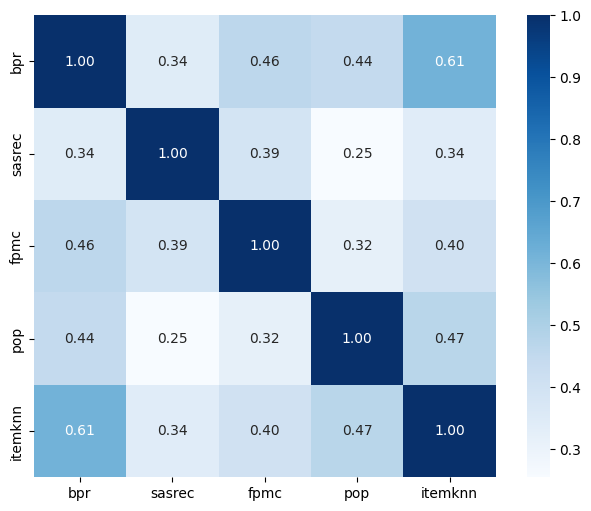

rbo
{0: 'bpr', 1: 'sasrec', 2: 'fpmc', 3: 'pop', 4: 'itemknn'}


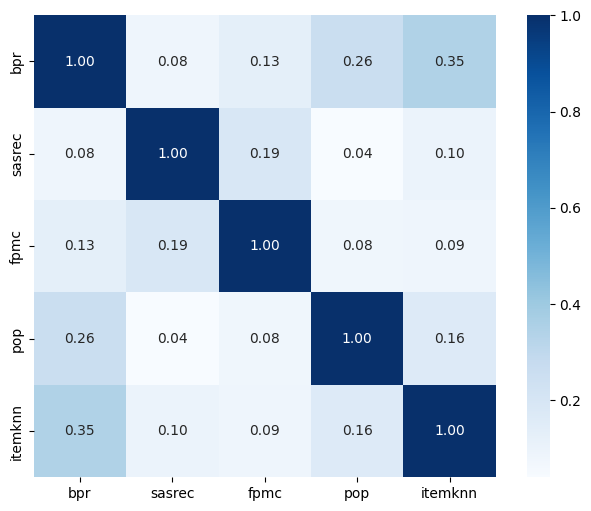

========== steam ==========
jaccard
{0: 'bpr', 1: 'sasrec', 2: 'fpmc', 3: 'pop', 4: 'itemknn'}


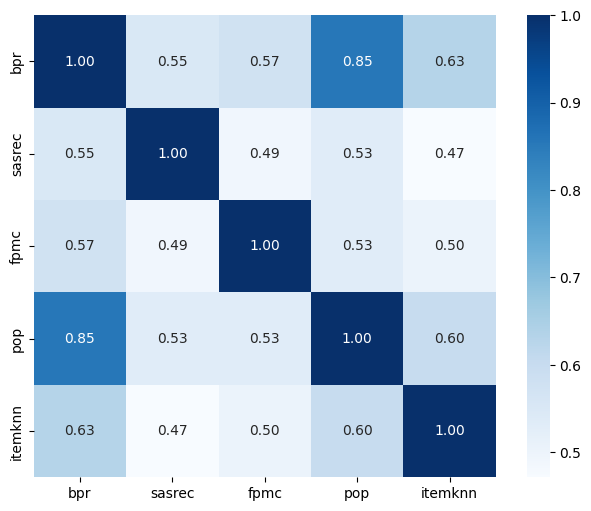

rbo
{0: 'bpr', 1: 'sasrec', 2: 'fpmc', 3: 'pop', 4: 'itemknn'}


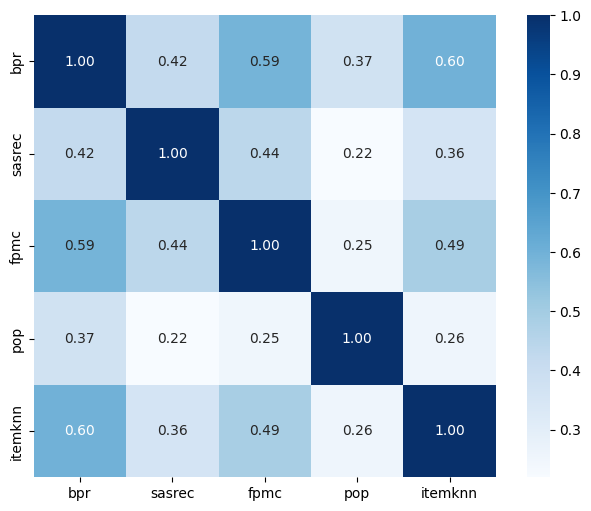

========== music ==========
jaccard
{0: 'bpr', 1: 'sasrec', 2: 'fpmc', 3: 'pop', 4: 'itemknn'}


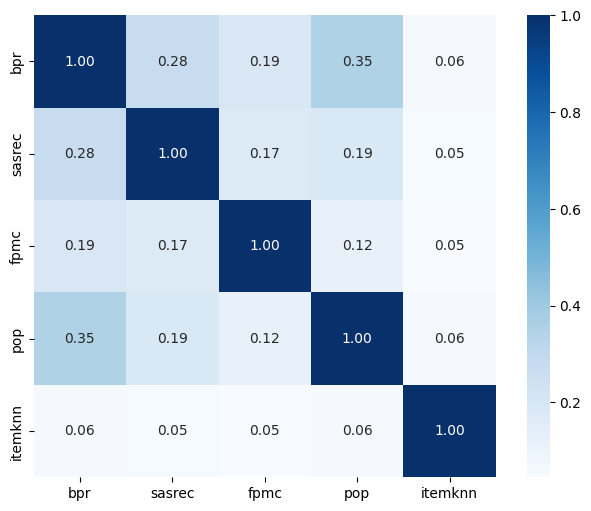

rbo
{0: 'bpr', 1: 'sasrec', 2: 'fpmc', 3: 'pop', 4: 'itemknn'}


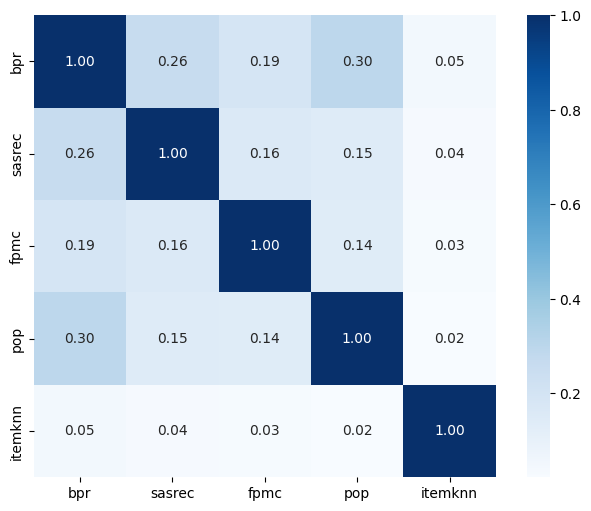

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

recallers = ['bpr', 'sasrec', 'fpmc', 'pop', 'itemknn']
similarity_dict = {
    "ml-1m": {
        "jaccard": {
            "bpr_vs_sasrec": 0.34273530362884574,
            "bpr_vs_fpmc": 0.46105757444633155,
            "bpr_vs_pop": 0.444434263661674,
            "bpr_vs_itemknn": 0.6134421115995813,
            "sasrec_vs_fpmc": 0.38874815022721565,
            "sasrec_vs_pop": 0.2539883657580121,
            "sasrec_vs_itemknn": 0.338885181548484,
            "fpmc_vs_pop": 0.31859217811453044,
            "fpmc_vs_itemknn": 0.40275755777363903,
            "pop_vs_itemknn": 0.47005992461972157,
            "average": 0.40347006113780354
        },
        "rbo": {
            "bpr_vs_sasrec": 0.08258759583764952,
            "bpr_vs_fpmc": 0.13135964670604944,
            "bpr_vs_pop": 0.2577950441433609,
            "bpr_vs_itemknn": 0.34590342620220366,
            "sasrec_vs_fpmc": 0.19305723421020202,
            "sasrec_vs_pop": 0.03979166691424811,
            "sasrec_vs_itemknn": 0.0992836502099173,
            "fpmc_vs_pop": 0.08083980497851037,
            "fpmc_vs_itemknn": 0.08839267603482477,
            "pop_vs_itemknn": 0.1641174113709889,
            "average": 0.1483128156607955
        }
    },
    "steam": {
        "jaccard": {
            "bpr_vs_itemknn": 0.6308220748941968,
            "bpr_vs_fpmc": 0.5746376430231429,
            "bpr_vs_pop": 0.854984443673129,
            "bpr_vs_sasrec": 0.5508810983313444,
            "itemknn_vs_fpmc": 0.5039287084961207,
            "itemknn_vs_pop": 0.6003215868790582,
            "itemknn_vs_sasrec": 0.4712966038266744,
            "fpmc_vs_pop": 0.5317308405072102,
            "fpmc_vs_sasrec": 0.4909579379310822,
            "pop_vs_sasrec": 0.5320244418094473,
            "average": 0.5741585379371407
        },
        "rbo": {
            "bpr_vs_itemknn": 0.5976655030859763,
            "bpr_vs_fpmc": 0.5909183916013645,
            "bpr_vs_pop": 0.3731503703535082,
            "bpr_vs_sasrec": 0.42053214798331184,
            "itemknn_vs_fpmc": 0.48833146395151233,
            "itemknn_vs_pop": 0.2561764282236138,
            "itemknn_vs_sasrec": 0.3593697550375676,
            "fpmc_vs_pop": 0.2526088409611869,
            "fpmc_vs_sasrec": 0.4397719959901045,
            "pop_vs_sasrec": 0.21928076296399454,
            "average": 0.39978056601521406
        }
    },
    "music": {
        "jaccard": {
            "bpr_vs_itemknn": 0.05931017970127901,
            "bpr_vs_fpmc": 0.19183792768378685,
            "bpr_vs_pop": 0.3486857576508974,
            "bpr_vs_sasrec": 0.2763329019130139,
            "itemknn_vs_fpmc": 0.04500210245874656,
            "itemknn_vs_pop": 0.05856352597831993,
            "itemknn_vs_sasrec": 0.05318460250694704,
            "fpmc_vs_pop": 0.11867892641235088,
            "fpmc_vs_sasrec": 0.17417130349015045,
            "pop_vs_sasrec": 0.18694072081894209,
            "average": 0.15127079486144343
        },
        "rbo": {
            "bpr_vs_itemknn": 0.04553230390159534,
            "bpr_vs_fpmc": 0.19411234240110908,
            "bpr_vs_pop": 0.29511417000419926,
            "bpr_vs_sasrec": 0.2600795002482322,
            "itemknn_vs_fpmc": 0.03326785313655516,
            "itemknn_vs_pop": 0.022283683544130312,
            "itemknn_vs_sasrec": 0.03514783197819881,
            "fpmc_vs_pop": 0.13908358114051256,
            "fpmc_vs_sasrec": 0.1597916601956278,
            "pop_vs_sasrec": 0.1450037198043686,
            "average": 0.1329416646354529
        }
    }
}


for dataset_name in similarity_dict.keys():
    print(f'========== {dataset_name} ==========' )
    for similarity_type in similarity_dict[dataset_name].keys():

        data = np.zeros((len(recallers), len(recallers)))
        recaller2idx = {recaller: i for i, recaller in enumerate(recallers)}
        idx2recaller = {i: recaller for i, recaller in enumerate(recallers)}
        for recaller1 in recallers:
            for recaller2 in recallers:
                if recaller1 == recaller2:
                    data[recaller2idx[recaller1], recaller2idx[recaller2]] = 1.0
                else:
                    if f"{recaller1}_vs_{recaller2}" not in similarity_dict[dataset_name][similarity_type]:
                        data[recaller2idx[recaller1], recaller2idx[recaller2]] = similarity_dict[dataset_name][similarity_type][f"{recaller2}_vs_{recaller1}"]
                    else:
                        data[recaller2idx[recaller1], recaller2idx[recaller2]] = similarity_dict[dataset_name][similarity_type][f"{recaller1}_vs_{recaller2}"]

        # 设置标签（横纵坐标 1-9）
        labels = [idx2recaller[i] for i in range(len(recallers))]

        plt.figure(figsize=(8, 6))
        sns.heatmap(
            data,
            xticklabels=labels,
            yticklabels=labels,
            cmap="Blues",
            annot=True,
            fmt=".2f",
            cbar=True,
            square=True
        )
        print(similarity_type)
        print(idx2recaller)
        plt.show()

## General Test

In [7]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers.trainer_utils import get_last_checkpoint

output_dir = "GRPO/grpo_models"
last_checkpoint = get_last_checkpoint(output_dir)

tokenizer = AutoTokenizer.from_pretrained(last_checkpoint)
model = AutoModelForCausalLM.from_pretrained(last_checkpoint, trust_remote_code=True, device_map="auto")

loading file tokenizer.json
loading file tokenizer.model
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_config.json
loading file chat_template.jinja
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
loading configuration file GRPO/grpo_models/checkpoint-5955/config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "dtype": "float32",
  "eos_token_id": 128009,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 16,
  "num_key_value_heads": 8,
  "pad_token_id": 128009,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "hig

In [9]:
import outlines
model = outlines.from_transformers(model, tokenizer)


In [10]:
from typing import Literal
from pydantic import BaseModel


# Simple classification
sentiment = model(
    "Analyze: 'This product completely changed my life!'",
    Literal["Positive", "Negative", "Neutral"]
)
print(sentiment)  # "Positive"

# Extract specific types
temperature = model("What's the boiling point of water in Celsius?", int)
print(temperature)  # 100

Positive
0


In [13]:
from pydantic import BaseModel
from enum import Enum

class Rating(Enum):
    poor = 1
    fair = 2
    good = 3
    excellent = 4

class ProductReview(BaseModel):
    rating: Rating
    pros: list[str]
    cons: list[str]
    summary: str

review = model(
    ["Review: The XPS 13 has great battery life and a stunning display, but it runs hot and the webcam is poor quality.", 
    "Review: The XPS 13 has great battery life and a stunning display, but it runs hot and the webcam is poor quality.",],
    ProductReview,
    max_new_tokens=200,
)

TypeError: The input type <class 'list'> is not available.The only available types are `str` and `Chat`.

In [12]:
review

'{"rating": 4, "pros": ["Stunning display", "Great battery life", "Good performance"], "cons": ["Runs hot", "Poor webcam quality"], "summary": "The XPS 13 is a great ultrabook with a stunning display and great battery life, but it has some drawbacks, including a hot design and a poor webcam quality."}'

=== Testing MovieLens Datasets ===

1. Testing ml-100k dataset...


/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

✅ ml-100k dataset loaded successfully!
   Users: 944
   Items: 1683
   Interactions: 100000

2. Testing ml-1m dataset...


Downloaded 0.01 GB: 100%|██████████| 7/7 [00:01<00:00,  5.82it/s]

❌ ml-1m dataset failed: Default process group has not been initialized, please make sure to call init_process_group.

=== MovieLens Dataset Testing Complete ===


=== Training Models on MovieLens ml-100k ===

--- Training Pop on ml-100k ---

=== Training Pop Model ===
❌ Pop training on ml-100k failed: File /home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/config/../dataset_example/ml-100k/ml-100k.train.inter not exist.

--- Training BPR on ml-100k ---

=== Training BPR Model ===
❌ BPR training on ml-100k failed: File /home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/config/../dataset_example/ml-100k/ml-100k.train.inter not exist.

--- Training SASRec on ml-100k ---

=== Training SASRec Model ===
❌ SASRec training on ml-100k failed: File /home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/config/../dataset_example/ml-100k/ml-100k.train.inter not exist.

MovieLens training completed! Successfully trained 0 models


=== Loading steam ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)

:bar_chart: 5-core Filtered Dataset Statistics:
[1;35msteam[0m
[1;34mThe number of users[0m: 25390
[1;34mAverage actions of users[0m: 11.929930284768995
[1;34mThe number of items[0m: 4090
[1;34mAverage actions of items[0m: 74.07410124724872
[1;34mThe number of inters[0m: 302889
[1;34mThe sparsity of the dataset[0m: 99.70832615116169%
[1;34mRemain Fields[0m: ['user_id', 'product_id', 'timestamp', 'product_id_list', 'timestamp_list', 'item_length']
[1;35msteam[0m
[1;34mThe number of users[0m: 25390
[1;34mAverage actions of users[0m: 9.929930284768995
[1;34mThe number of items[0m: 4090
[1;34mAverage actions of items[0m: 61.701174743024964
[1;34mThe number of inters[0m: 252111
[1;34mThe sparsity of the dataset[0m: 99.75722398071744%
[1;34mRemain Fields[0m: ['user_id', 'product_id', 'timestamp', 'product_id_list', 'timestamp_list', 'item_length']
(25389,)
[1;35msteam[0m
[1;34mThe number of users[0m: 25390
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 4090
[1;34mAverage actions of items[0m: 9.252551020408163
[1;34mThe number of inters[0m: 25389
[1;34mThe sparsity of the dataset[0m: 99.97555108522212%
[1;34mRemain Fields[0m: ['user_id', 'product_id', 'timestamp', 'product_id_list', 'timestamp_list', 'item_length']
(25389,)
[1;35msteam[0m
[1;34mThe number of users[0m: 25390
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 4090
[1;34mAverage actions of items[0m: 10.027251184834123
[1;34mThe number of inters[0m: 25389
[1;34mThe sparsity of the dataset[0m: 99.97555108522212%
[1;34mRemain Fields[0m: ['user_id', 'product_id', 'timestamp', 'product_id_list', 'timestamp_list', 'item_length']
(25389,)
=== Loading ml-10m ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)

:bar_chart: 5-core Filtered Dataset Statistics:
[1;35mml-10m[0m
[1;34mThe number of users[0m: 69815
[1;34mAverage actions of users[0m: 117.03065287764632
[1;34mThe number of items[0m: 9889
[1;34mAverage actions of items[0m: 826.2922734627832
[1;34mThe number of inters[0m: 8170378
[1;34mThe sparsity of the dataset[0m: 98.81657420789803%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
[1;35mml-10m[0m
[1;34mThe number of users[0m: 69815
[1;34mAverage actions of users[0m: 115.03065287764632
[1;34mThe number of items[0m: 9889
[1;34mAverage actions of items[0m: 812.1713187702265
[1;34mThe number of inters[0m: 8030750
[1;34mThe sparsity of the dataset[0m: 98.83679841007076%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(69814,)
[1;35mml-10m[0m
[1;34mThe number of users[0m: 69815
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 9889
[1;34mAverage actions of items[0m: 11.552871090517955
[1;34mThe number of inters[0m: 69814
[1;34mThe sparsity of the dataset[0m: 99.98988789891364%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(69814,)
[1;35mml-10m[0m
[1;34mThe number of users[0m: 69815
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 9889
[1;34mAverage actions of items[0m: 11.064025356576861
[1;34mThe number of inters[0m: 69814
[1;34mThe sparsity of the dataset[0m: 99.98988789891364%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(69814,)
=== Loading Amazon_Toys_and_Games ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)

:bar_chart: 5-core Filtered Dataset Statistics:
[1;35mAmazon_Toys_and_Games[0m
[1;34mThe number of users[0m: 360660
[1;34mAverage actions of users[0m: 7.992821474023939
[1;34mThe number of items[0m: 143927
[1;34mAverage actions of items[0m: 20.03031629561689
[1;34mThe number of inters[0m: 2882683
[1;34mThe sparsity of the dataset[0m: 99.99444662967173%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
[1;35mAmazon_Toys_and_Games[0m
[1;34mThe number of users[0m: 360660
[1;34mAverage actions of users[0m: 5.992821474023939
[1;34mThe number of items[0m: 143927
[1;34mAverage actions of items[0m: 15.07564449528486
[1;34mThe number of inters[0m: 2161365
[1;34mThe sparsity of the dataset[0m: 99.99583621915433%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(360659,)
[1;35mAmazon_Toys_and_Games[0m
[1;34mThe number of users[0m: 360660
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 143927
[1;34mAverage actions of items[0m: 3.597631896577522
[1;34mThe number of inters[0m: 360659
[1;34mThe sparsity of the dataset[0m: 99.99930520525871%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(360659,)
[1;35mAmazon_Toys_and_Games[0m
[1;34mThe number of users[0m: 360660
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 143927
[1;34mAverage actions of items[0m: 3.7043477367734514
[1;34mThe number of inters[0m: 360659
[1;34mThe sparsity of the dataset[0m: 99.99930520525871%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(360659,)
=== Loading ml-1m ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)

:bar_chart: 5-core Filtered Dataset Statistics:
[1;35mml-1m[0m
[1;34mThe number of users[0m: 6039
[1;34mAverage actions of users[0m: 137.42149718449818
[1;34mThe number of items[0m: 3308
[1;34mAverage actions of items[0m: 250.9074690051406
[1;34mThe number of inters[0m: 829751
[1;34mThe sparsity of the dataset[0m: 95.84647093369118%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
[1;35mml-1m[0m
[1;34mThe number of users[0m: 6039
[1;34mAverage actions of users[0m: 135.42149718449818
[1;34mThe number of items[0m: 3308
[1;34mAverage actions of items[0m: 247.25582098578772
[1;34mThe number of inters[0m: 817675
[1;34mThe sparsity of the dataset[0m: 95.90692041432422%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(6038,)
[1;35mml-1m[0m
[1;34mThe number of users[0m: 6039
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 3308
[1;34mAverage actions of items[0m: 3.244492208490059
[1;34mThe number of inters[0m: 6038
[1;34mThe sparsity of the dataset[0m: 99.96977525968347%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(6038,)
[1;35mml-1m[0m
[1;34mThe number of users[0m: 6039
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 3308
[1;34mAverage actions of items[0m: 3.3940415964024733
[1;34mThe number of inters[0m: 6038
[1;34mThe sparsity of the dataset[0m: 99.96977525968347%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(6038,)
=== Loading yelp2022 ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)

:bar_chart: 5-core Filtered Dataset Statistics:
[1;35myelp2022[0m
[1;34mThe number of users[0m: 207649
[1;34mAverage actions of users[0m: 14.340557096625059
[1;34mThe number of items[0m: 89204
[1;34mAverage actions of items[0m: 33.38252505549203
[1;34mThe number of inters[0m: 2977788
[1;34mThe sparsity of the dataset[0m: 99.98392394059113%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
[1;35myelp2022[0m
[1;34mThe number of users[0m: 207649
[1;34mAverage actions of users[0m: 12.340557096625059
[1;34mThe number of items[0m: 89204
[1;34mAverage actions of items[0m: 28.747470214723236
[1;34mThe number of inters[0m: 2562492
[1;34mThe sparsity of the dataset[0m: 99.98616598171972%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(207648,)
[1;35myelp2022[0m
[1;34mThe number of users[0m: 207649
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 89204
[1;34mAverage actions of items[0m: 3.85118142364331
[1;34mThe number of inters[0m: 207648
[1;34mThe sparsity of the dataset[0m: 99.9988789794357%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(207648,)
[1;35myelp2022[0m
[1;34mThe number of users[0m: 207649
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 89204
[1;34mAverage actions of items[0m: 3.849539311469939
[1;34mThe number of inters[0m: 207648
[1;34mThe sparsity of the dataset[0m: 99.9988789794357%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(207648,)
=== Loading Amazon_Books ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)

:bar_chart: 5-core Filtered Dataset Statistics:
[1;35mAmazon_Books[0m
[1;34mThe number of users[0m: 689537
[1;34mAverage actions of users[0m: 11.156473338592908
[1;34mThe number of items[0m: 449585
[1;34mAverage actions of items[0m: 17.11140175856539
[1;34mThe number of inters[0m: 7692790
[1;34mThe sparsity of the dataset[0m: 99.99751849880246%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
[1;35mAmazon_Books[0m
[1;34mThe number of users[0m: 689537
[1;34mAverage actions of users[0m: 9.156473338592908
[1;34mThe number of items[0m: 449585
[1;34mAverage actions of items[0m: 14.076404805008337
[1;34mThe number of inters[0m: 6313718
[1;34mThe sparsity of the dataset[0m: 99.99796335285664%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(689536,)
[1;35mAmazon_Books[0m
[1;34mThe number of users[0m: 689537
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 449585
[1;34mAverage actions of items[0m: 2.8250062478746982
[1;34mThe number of inters[0m: 689536
[1;34mThe sparsity of the dataset[0m: 99.9997775729729%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(689536,)
[1;35mAmazon_Books[0m
[1;34mThe number of users[0m: 689537
[1;34mAverage actions of users[0m: 1.0~
[1;34mThe number of items[0m: 449585
[1;34mAverage actions of items[0m: 2.968235724586212
[1;34mThe number of inters[0m: 689536
[1;34mThe sparsity of the dataset[0m: 99.9997775729729%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(689536,)
=== Loading book-crossing ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)
Error loading book-crossing: [timestamp] is not exist in interaction [The batch_size of interaction: 116923
    user_id, torch.Size([116923]), cpu, torch.int64
    item_id, torch.Size([116923]), cpu, torch.int64
    rating, torch.Size([116923]), cpu, torch.float32

].
=== Loading Amazon_All_Beauty ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)

:bar_chart: 5-core Filtered Dataset Statistics:
[1;35mAmazon_All_Beauty[0m
[1;34mThe number of users[0m: 199
[1;34mAverage actions of users[0m: 8.535353535353535
[1;34mThe number of items[0m: 281
[1;34mAverage actions of items[0m: 6.101083032490974
[1;34mThe number of inters[0m: 1690
[1;34mThe sparsity of the dataset[0m: 96.97777141937445%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
[1;35mAmazon_All_Beauty[0m
[1;34mThe number of users[0m: 199
[1;34mAverage actions of users[0m: 6.5353535353535355
[1;34mThe number of items[0m: 281
[1;34mAverage actions of items[0m: 4.864661654135339
[1;34mThe number of inters[0m: 1294
[1;34mThe sparsity of the dataset[0m: 97.68593858974587%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(198,)
[1;35mAmazon_All_Beauty[0m
[1;34mThe number of users[0m: 199
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 281
[1;34mAverage actions of items[0m: 1.5114503816793894
[1;34mThe number of inters[0m: 198
[1;34mThe sparsity of the dataset[0m: 99.64591641481428%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(198,)
[1;35mAmazon_All_Beauty[0m
[1;34mThe number of users[0m: 199
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 281
[1;34mAverage actions of items[0m: 1.81651376146789
[1;34mThe number of inters[0m: 198
[1;34mThe sparsity of the dataset[0m: 99.64591641481428%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(198,)
=== Loading Amazon_Musical_Instruments ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)

:bar_chart: 5-core Filtered Dataset Statistics:
[1;35mAmazon_Musical_Instruments[0m
[1;34mThe number of users[0m: 48454
[1;34mAverage actions of users[0m: 7.8265742059315215
[1;34mThe number of items[0m: 21414
[1;34mAverage actions of items[0m: 17.713158017656127
[1;34mThe number of inters[0m: 379221
[1;34mThe sparsity of the dataset[0m: 99.96345188811027%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
[1;35mAmazon_Musical_Instruments[0m
[1;34mThe number of users[0m: 48454
[1;34mAverage actions of users[0m: 5.8265742059315215
[1;34mThe number of items[0m: 21414
[1;34mAverage actions of items[0m: 13.218850962213795
[1;34mThe number of inters[0m: 282315
[1;34mThe sparsity of the dataset[0m: 99.97279137967531%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(48453,)
[1;35mAmazon_Musical_Instruments[0m
[1;34mThe number of users[0m: 48454
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 21414
[1;34mAverage actions of items[0m: 3.3051159618008183
[1;34mThe number of inters[0m: 48453
[1;34mThe sparsity of the dataset[0m: 99.99533025421748%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(48453,)
[1;35mAmazon_Musical_Instruments[0m
[1;34mThe number of users[0m: 48454
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 21414
[1;34mAverage actions of items[0m: 3.3866638708324595
[1;34mThe number of inters[0m: 48453
[1;34mThe sparsity of the dataset[0m: 99.99533025421748%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(48453,)
=== Loading anime ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)
Error loading anime: [timestamp] is not exist in interaction [The batch_size of interaction: 7793926
    user_id, torch.Size([7793926]), cpu, torch.int64
    item_id, torch.Size([7793926]), cpu, torch.int64
    rating, torch.Size([7793926]), cpu, torch.float32

].
=== Loading Food ===
Creating 5-core filtered dataset...
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/home/zzheng3/miniconda3/envs/rs/lib/python3.12/site-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=feat[field].mean(), inplace=True)

:bar_chart: 5-core Filtered Dataset Statistics:
[1;35mFood[0m
[1;34mThe number of users[0m: 16645
[1;34mAverage actions of users[0m: 30.48594087959625
[1;34mThe number of items[0m: 39448
[1;34mAverage actions of items[0m: 12.863031409232642
[1;34mThe number of inters[0m: 507408
[1;34mThe sparsity of the dataset[0m: 99.92272330829917%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
[1;35mFood[0m
[1;34mThe number of users[0m: 16645
[1;34mAverage actions of users[0m: 28.48594087959625
[1;34mThe number of items[0m: 39448
[1;34mAverage actions of items[0m: 12.019469654717842
[1;34mThe number of inters[0m: 474120
[1;34mThe sparsity of the dataset[0m: 99.9277929692295%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(16644,)
[1;35mFood[0m
[1;34mThe number of users[0m: 16645
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 39448
[1;34mAverage actions of items[0m: 1.7695088241547947
[1;34mThe number of inters[0m: 16644
[1;34mThe sparsity of the dataset[0m: 99.99746516953483%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(16644,)
[1;35mFood[0m
[1;34mThe number of users[0m: 16645
[1;34mAverage actions of users[0m: 1.0
[1;34mThe number of items[0m: 39448
[1;34mAverage actions of items[0m: 1.801103776647549
[1;34mThe number of inters[0m: 16644
[1;34mThe sparsity of the dataset[0m: 99.99746516953483%
[1;34mRemain Fields[0m: ['user_id', 'item_id', 'rating', 'timestamp', 'item_id_list', 'rating_list', 'timestamp_list', 'item_length']
(16644,)